# Declaration of Originality

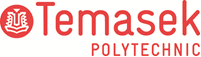

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Hugo Yee (2401496A)
* Tutorial Group                : PC06
* Tutor						    : Mr Emile
* Submission Date               : 11/2/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [38]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

# 1. Business Understanding
Project Goal

The main goal of this dataset is to build a model that predicts whether a bank client will subscribe to a term deposit (yes/no) after being contacted during a direct marketing phone campaign by a bank.

Business Problem:
Banks run telemarketing campaigns to try to convince existing or potential clients to purchase a term deposit product (a savings/investment product). Each phone call generates data about the client and campaign interaction. The company wants to identify which customers are more likely to subscribe to the product so that they can better allocate marketing resources and improve campaign effectiveness.


# 2. Data Understanding

## 2.1 Load dataset

In [39]:
## Read *.csv file into pandas DataFrame
FILE_PATH = "bank-full.csv"
df = pd.read_csv(FILE_PATH, sep=";")


This code reads the `bank-full.csv `file into a pandas DataFrame so the data can be worked with in Python. The file path is stored in FILE_PATH to keep the code clear and easy to update, and `pd.read_csv()` is used with `sep=";"` because the dataset uses semicolons as delimiters, ensuring the columns are parsed correctly.

### 2.1.1 Sanity check

In [40]:
df.shape  # Sanity check: shows (rows, columns) to confirm the dataset loaded correctly and meets the >1000 rows requirement.


(45211, 17)

`df.shape` is used as a fast sanity check after loading the dataset. It returns the number of rows and columns, which helps confirm the file was parsed correctly and that the dataset meets the requirement of having more than 1,000 rows

### 2.1.2 Initial Data Preview

In [41]:
df.head()  # Quick preview: displays the first 5 rows to verify columns/values look correct


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


`df.head()` previews the first few rows to verify that the columns look correct (categorical fields like job, marital, month, and numeric fields like age, balance). This help me to confirm the target column, which in this dataset is y with a yes/no outcome for classification.

## 2.2 Summary Statistics

### 2.2.1 Type of Variable for Each Column

In [42]:
## Understand the type of variable for each column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45209 non-null  object 
 5   balance    45209 non-null  float64
 6   housing    45204 non-null  object 
 7   loan       45206 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45210 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 5.9+ MB


**Explanation and rationale**:
This step is used to understand the structure of the dataset by showing each column’s data type and the number of non-null values. It helps identify which variables are numeric and which are categorical, which is important for deciding how the data should be prepared for analysis and modeling.

**Insights**:
The dataset contains 45,211 rows and 17 columns. There are `7 numeric variables` (such as age, balance, and duration) and `10 categorical variables` (such as job, education, and month). All columns have complete data with no missing values, so no immediate data cleaning is required.

### 2.2.2 Number of Unique Values per Column

In [43]:
df.nunique()


age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

**Explanation and rationale**:
This step shows how many distinct values appear in each column. It helps differentiate between categorical variables with a small set of possible values and numeric variables that span a wide range, which is useful when choosing encoding and preprocessing methods.

**Insights**:
Categorical columns such as job (12 values), marital (3 values), and education (4 values) have a limited number of categories. Numeric columns like balance and duration have many unique values, indicating continuous variables that may require scaling or outlier handling later.

### 2.2.3 Check for Missing Data

In [44]:
df.isna().sum()


age          0
job          0
marital      0
education    0
default      2
balance      2
housing      7
loan         5
contact      0
day          0
month        1
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Explanation and rationale**:
This step checks whether any values are missing in each column. Missing data can cause errors in analysis or bias results if not handled properly, so it is important to detect it early.

**Insights**:
A small number of missing values were detected in a few columns (default, balance, housing, loan, and duration), while all other features contain complete data.

### 2.2.3.1 Handling Missing Data

In [45]:
# Columns with true missing values
cols_with_na = ['default', 'balance', 'housing', 'loan', 'duration','month']

# Drop rows that contain NaNs in these columns
df = df.dropna(subset=cols_with_na)

# Verify
df.isna().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Explanation and rationale:**

The rows containing missing values were removed because the number of affected records is extremely small compared to the overall dataset size. Dropping these rows avoids introducing artificial values through imputation, particularly for financial and loan-related attributes where imputed values may distort the true distribution. This approach ensures data integrity while having a negligible impact on the dataset.

### 2.2.4 Describe Data Distribution

In [46]:
df.describe(include="all")


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45194.000000,45194,45194,45194,45194,45194.000000,45194,45194,45194,45194.000000,45194,45194.000000,45194.000000,45194.000000,45194.000000,45194,45194
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9728,27206,23194,44379,NaN,25118,37952,29285,NaN,13749,NaN,NaN,NaN,NaN,36942,39906
mean,40.934925,NaN,NaN,NaN,NaN,1362.634243,NaN,NaN,NaN,15.810462,NaN,258.120835,2.764261,40.213325,0.580542,NaN,NaN
std,10.619131,NaN,NaN,NaN,NaN,3045.256084,NaN,NaN,NaN,8.321429,NaN,257.443978,3.098507,100.144388,2.303847,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,449.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


**Explanation and rationale**:
This step provides summary statistics for both numeric and categorical variables. For numeric data, it includes measures such as mean, standard deviation, and quartiles. For categorical data, it shows the most frequent values and their counts.

**Insights**:
The average customer age is approximately 41 years, with ages ranging from 18 to 95. The balance variable shows a wide spread, including negative values and very large positive values, suggesting potential outliers. Categorical summaries show that blue-collar is the most common job, married is the most common marital status, and most clients did not subscribe to the product (y = no).

### 2.2.5 Statistical Summary (Mean, Minimum, Maximum)

In [47]:
df.select_dtypes(include='number').agg(['mean', 'min', 'max'])


,age,balance,day,duration,campaign,pdays,previous
mean,40.934925,1362.634243,15.810462,258.120835,2.764261,40.213325,0.580542
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Explanation and rationale**:
This step focuses on key summary statistics for numeric variables only. It provides a concise view of central tendency and range, which is useful for quickly identifying unusual values or extreme ranges.

**Insights**:
The mean age is around 41, while balances range from -8,019 to 102,127, indicating strong variability. The duration variable ranges from 0 to 4,918 seconds, suggesting a highly skewed distribution that may need special consideration during modeling.

### 2.2.6 Correlation Analysis

In [48]:
df.corr(numeric_only=True)


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097857,-0.008967,-0.004872,0.004807,-0.023713,0.001319
balance,0.097857,1.000000,0.004350,0.021644,-0.014627,0.003387,0.016644
day,-0.008967,0.004350,1.000000,-0.030017,0.162371,-0.093276,-0.051850
duration,-0.004872,0.021644,-0.030017,1.000000,-0.084537,-0.001498,0.001245
campaign,0.004807,-0.014627,0.162371,-0.084537,1.000000,-0.088689,-0.032891
pdays,-0.023713,0.003387,-0.093276,-0.001498,-0.088689,1.000000,0.454801
previous,0.001319,0.016644,-0.051850,0.001245,-0.032891,0.454801,1.000000


**Explanation and rationale**:
This step calculates correlations between numeric variables to identify linear relationships. Correlation analysis helps detect redundant features and understand how variables relate to one another.

**Insights**:
Most numeric variables show weak correlations with each other. The strongest relationship is between pdays and previous (moderate positive correlation), which makes sense since both relate to previous contact history. No strong multicollinearity is observed among the remaining numeric features

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

####  2.3.1.1.1 Target class balance (y)

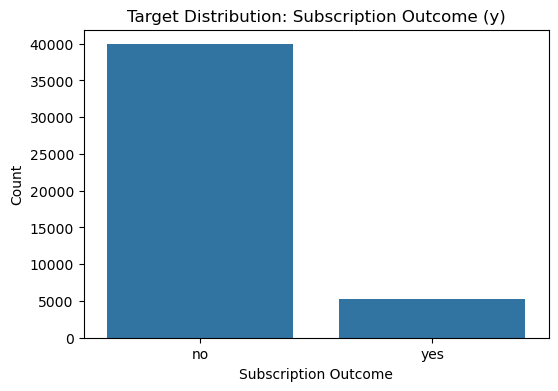

In [49]:
# Set figure size for clarity
plt.figure(figsize=(6,4))
# Count the number of occurrences for each class in target variable 'y'
sns.countplot(x="y", data=df)
# Add title and axis labels
plt.title("Target Distribution: Subscription Outcome (y)")
plt.xlabel("Subscription Outcome")
plt.ylabel("Count")
# Display the plot
plt.show()


**Explanation and rationale**:
This plot visualises the frequency of each class in the target variable `y`, which represents whether a customer subscribed to the product. Examining the target distribution is a critical step in classification problems, as a strong imbalance can bias model training and lead to misleading performance metrics.

**Insights**:
The plot shows that the `no` class heavily dominates the dataset, while the `yes` class represents a much smaller proportion of observations. This confirms a clear class imbalance, indicating that most customers did not subscribe. For modeling, this suggests that accuracy alone would not be sufficient to evaluate performance, and metrics that account for minority class prediction should be prioritised.

### 2.3.1.2 Understanding distribution of features

#### 2.3.1.2.1 Numeric feature distribution (age histogram)

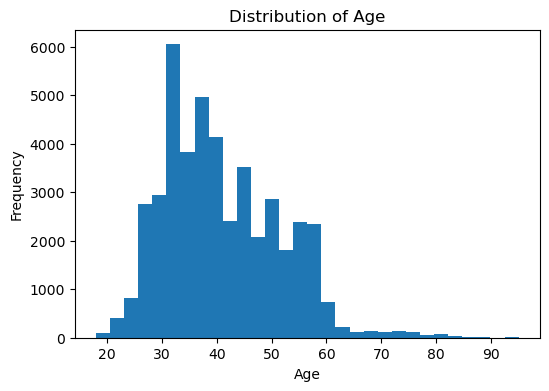

In [50]:
# Set figure size
plt.figure(figsize=(6,4))
# Plot histogram of 'age' with 30 bins
plt.hist(df["age"], bins=30)
# Add title and axis labels
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
# Display the histogram
plt.show()


**Explanation and rationale**: A histogram is used to examine the distribution of the numeric variable age. This allows the overall shape of the data, common age ranges, and potential extreme values to be clearly observed.

**Insights**: The distribution shows that most customers are `aged 30–40`, with the highest concentration in the `early to mid-30`s. Fewer customers are above 60, though some older outliers exist. The mean age is around 41, influenced by these older customers. Overall, age shows mild skewness and limited extremes, making it a reasonably informative feature for modeling.

#### 2.3.1.2.2 Numeric feature outliers (balance boxplot)

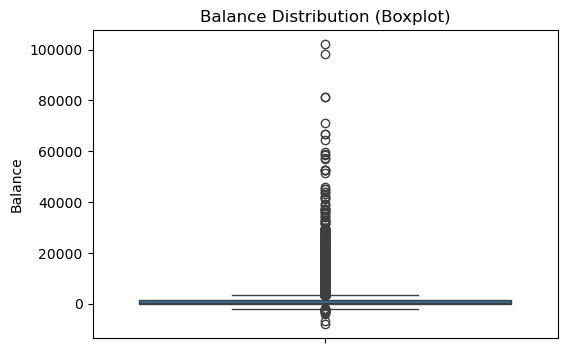

In [51]:
# Set figure size
plt.figure(figsize=(6,4))
# Boxplot of 'balance' to visualise spread and outliers
sns.boxplot(y="balance", data=df)
# Add title and y-axis label
plt.title("Balance Distribution (Boxplot)")
plt.ylabel("Balance")
# Display the boxplot
plt.show()

**Explanation and rationale**: A boxplot is used to highlight the spread of balance values and to clearly identify extreme observations. This is appropriate given that earlier summary statistics indicated a very wide range for this feature.

**Insights**: The boxplot shows that most balances are `clustered near the lower end of the range`, while there are many extreme positive outliers and some negative values. This confirms that the balance distribution is highly skewed and influenced by a small number of very large values.

#### 2.3.1.2.3 Numeric feature spread (duration boxplot)

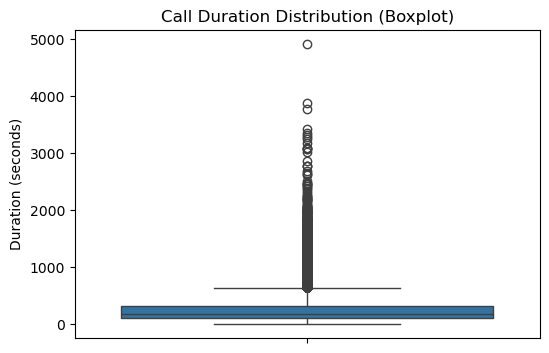

In [52]:
# Set figure size
plt.figure(figsize=(6,4))
# Boxplot of 'duration' to examine distribution and detect extreme call lengths
sns.boxplot(y="duration", data=df)
# Add title and y-axis label
plt.title("Call Duration Distribution (Boxplot)")
plt.ylabel("Duration (seconds)")
# Display the plot
plt.show()

**Explanation and rationale**: This boxplot visualises how call duration is distributed and highlights the presence of extreme call lengths. It helps assess whether the feature is skewed and whether outliers are present.

**Insights**: The distribution of call duration is `strongly right-skewed`, with a large number of long-duration outliers. Most calls are relatively short, while a smaller number extend to much longer durations. This indicates that duration varies substantially across customers and may carry strong predictive signal, but its skewness suggests it should be handled carefully during modeling.

#### 2.3.1.2.4 Categorical feature distribution (job)

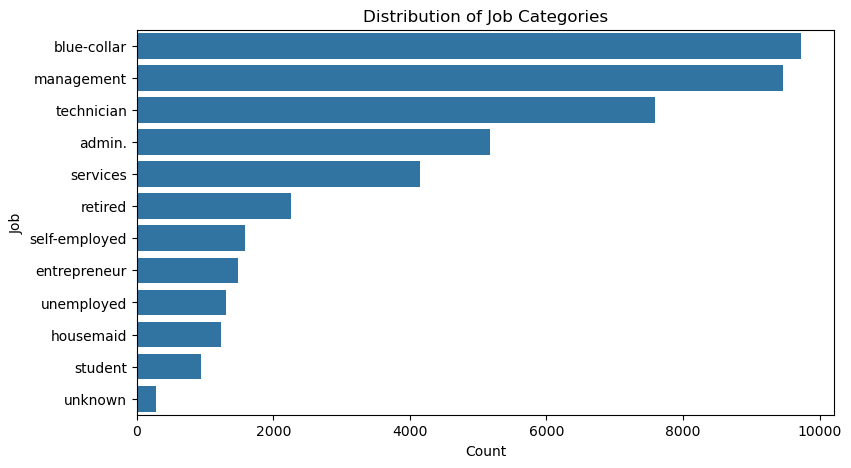

In [53]:
# Set figure size
plt.figure(figsize=(9,5))
# Countplot for 'job' categories ordered by frequency
sns.countplot(y="job", data=df, order=df["job"].value_counts().index)
# Add title and axis labels
plt.title("Distribution of Job Categories")
plt.xlabel("Count")
plt.ylabel("Job")
# Display the plot
plt.show()


**Explanation and rationale**: This plot shows the frequency of each job category. Since job contains many categories, visualising their distribution helps identify dominant groups and less frequent categories that may influence encoding decisions.

**Insights**: The plot shows that `blue-collar, management, and technician roles are the most common job categories`, while categories such as student and unknown appear far less frequently. This imbalance suggests that some job categories may contribute limited information individually and that rare categories may need careful handling during feature encoding.

####  2.3.1.2.5 Categorical feature distribution (education)

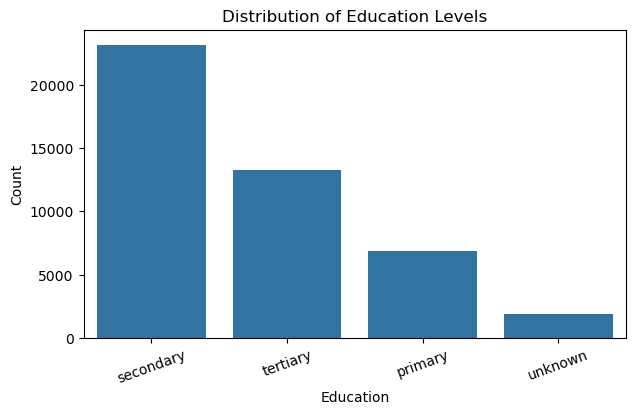

In [54]:
# Set figure size
plt.figure(figsize=(7,4))
# Countplot for 'education' ordered by frequency
sns.countplot(x="education", data=df, order=df["education"].value_counts().index)
# Add title, axis labels, and rotate x-ticks for readability
plt.title("Distribution of Education Levels")
plt.xlabel("Education")
plt.ylabel("Count")
plt.xticks(rotation=20)
# Display the plot
plt.show()

**Explanation and rationale**: This count plot visualises the distribution of education levels, which have a relatively small number of categories. It helps identify whether certain education levels dominate the dataset.

**Insights**: `Secondary education` is the most common category, followed by tertiary and primary education, with a smaller proportion of unknown values. Although the categories are imbalanced, all education levels are sufficiently represented, indicating that this feature can be retained for modeling.

### 2.3.2 Understanding relationship between variables

### 2.3.2.1 Target vs numeric features

#### 2.3.2.1.1 duration vs y

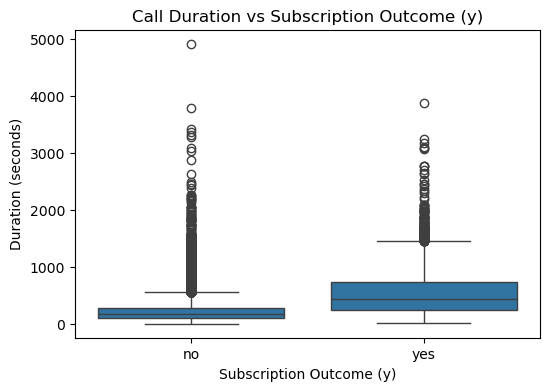

In [55]:
# Set figure size
plt.figure(figsize=(6,4))
# Boxplot of 'duration' grouped by target 'y'
sns.boxplot(x="y", y="duration", data=df)
# Add title and axis labels
plt.title("Call Duration vs Subscription Outcome (y)")
plt.xlabel("Subscription Outcome (y)")
plt.ylabel("Duration (seconds)")
# Display the plot
plt.show()

**Explanation and rationale**: This boxplot compares call duration across subscription outcomes, allowing differences in central tendency and spread between the two classes to be observed.

**Insights**: `Customers who subscribed (yes) have noticeably longer call durations on average`, with higher median and upper-range values than non-subscribers. Although there is overlap between the two groups, the separation suggests that duration is strongly associated with subscription outcome and is likely to be a highly informative feature.

#### 2.3.2.1.2 balance vs y

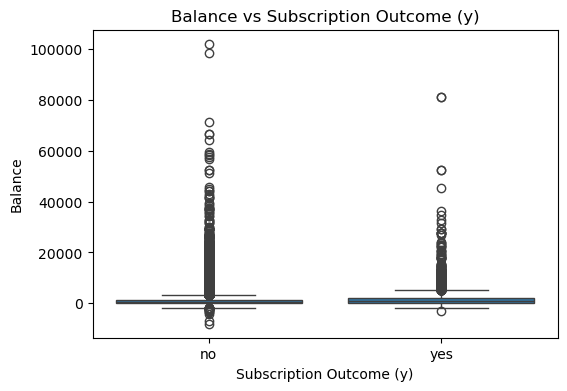

In [56]:
# Set figure size
plt.figure(figsize=(6,4))
# Boxplot of 'balance' grouped by target 'y'
sns.boxplot(x="y", y="balance", data=df)
# Add title and axis labels
plt.title("Balance vs Subscription Outcome (y)")
plt.xlabel("Subscription Outcome (y)")
plt.ylabel("Balance")
# Display the plot
plt.show()

**Explanation and rationale**: This plot compares balance values between customers who subscribed and those who did not, helping assess whether financial standing differs by outcome.

**Insights**: The balance distributions for the two classes overlap substantially, with extreme values present in both groups. `Subscribers tend to have slightly higher balances on average`, but the overlap suggests that b`alance alone does not strongly separate the classes` and may be more useful in combination with other features.

#### 2.3.2.1.3 campaign vs y

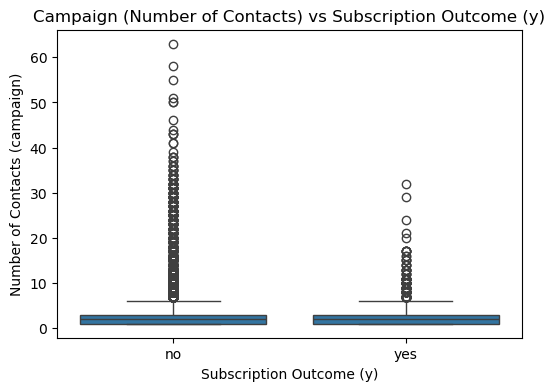

In [57]:
# Set figure size
plt.figure(figsize=(6,4))
# Boxplot of 'campaign' (number of contacts) grouped by target 'y'
sns.boxplot(x="y", y="campaign", data=df)
# Add title and axis labels
plt.title("Campaign (Number of Contacts) vs Subscription Outcome (y)")
plt.xlabel("Subscription Outcome (y)")
plt.ylabel("Number of Contacts (campaign)")
# Display the plot
plt.show()


**Explanation and rationale**: This boxplot examines whether the number of contact attempts during the campaign differs between subscription outcomes.

**Insights**: `Subscribers generally have lower campaign counts`, while non-subscribers show a wider spread with many high-contact outliers. This suggests diminishing returns from repeated contact attempts and indicates that higher campaign counts may be associated with lower likelihood of subscription.

### 2.3.2.2 Target vs categorical features

#### 2.3.2.2.1 housing vs y

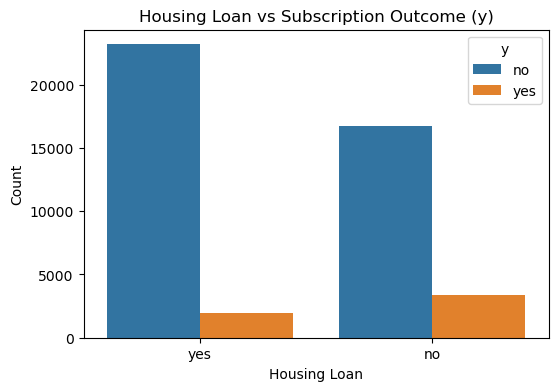

In [58]:
# Set figure size
plt.figure(figsize=(6,4))
# Countplot of 'housing' vs target 'y' using hue
sns.countplot(x="housing", hue="y", data=df)
# Add title and axis labels
plt.title("Housing Loan vs Subscription Outcome (y)")
plt.xlabel("Housing Loan")
plt.ylabel("Count")
# Add legend with title
plt.legend(title="y")
# Display the plot
plt.show()

**Explanation and rationale**: This plot compares subscription outcomes for customers with and without housing loans, allowing differences in subscription behaviour to be observed across loan status.

**Insights**: `Customers without housing loans show a higher proportion of subscriptions compared to those with housing loans`. This suggests that existing long-term financial commitments may reduce a customer’s likelihood of subscribing to additional products.

#### 2.3.2.2.2 loan vs y

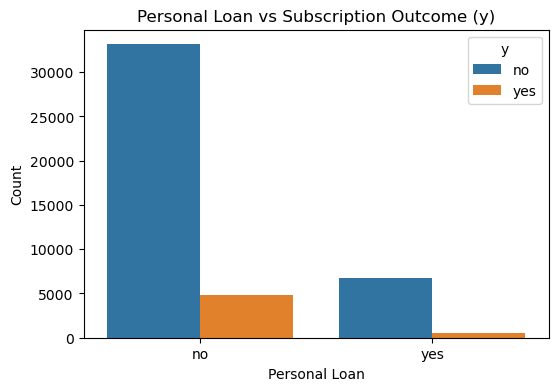

In [59]:
# Set figure size
plt.figure(figsize=(6,4))
# Countplot of 'loan' vs target 'y' using hue
sns.countplot(x="loan", hue="y", data=df)
# Add title and axis labels
plt.title("Personal Loan vs Subscription Outcome (y)")
plt.xlabel("Personal Loan")
plt.ylabel("Count")
# Add legend with title
plt.legend(title="y")
# Display the plot
plt.show()


**Explanation and rationale**: This visualisation compares subscription outcomes for customers with and without personal loans, providing insight into how loan status relates to decision-making.

**Insights**:` Customers without personal loans appear more likely to subscribe` than those with loans. This pattern suggests that customers with fewer existing financial obligations may be more receptive to marketing offers.

#### 2.3.2.2.3 job vs y

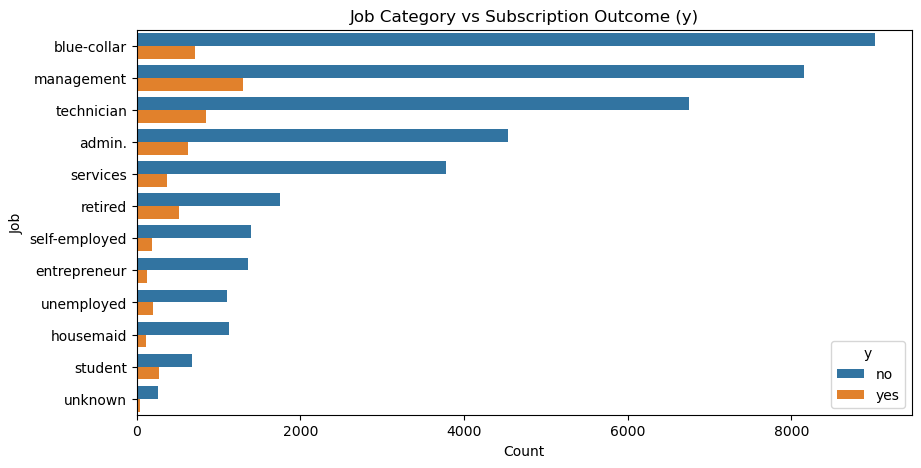

In [60]:
# Set figure size
plt.figure(figsize=(10,5))
# Countplot of 'job' vs target 'y' using hue, ordered by frequency
sns.countplot(y="job", hue="y", data=df, order=df["job"].value_counts().index)
# Add title and axis labels
plt.title("Job Category vs Subscription Outcome (y)")
plt.xlabel("Count")
plt.ylabel("Job")
# Add legend with title
plt.legend(title="y")
# Display the plot
plt.show()


**Explanation and rationale**: This plot examines how subscription outcomes vary across job categories, helping assess whether occupation is associated with customer behaviour.

**Insights**: The plot shows that all `job categories have substantially more non-subscribers than subscribers`, which is `consistent` with the overall class imbalance observed in the target variable. Job groups such as blue-collar, management, and technician contribute the highest number of subscriptions in absolute terms, primarily because they are the largest groups in the dataset. While this suggests that job category may still be informative, the visualization does not indicate higher subscription likelihood for specific jobs, and proportions would need to be examined to confirm that.

#### 2.3.2.2.4 poutcome vs y

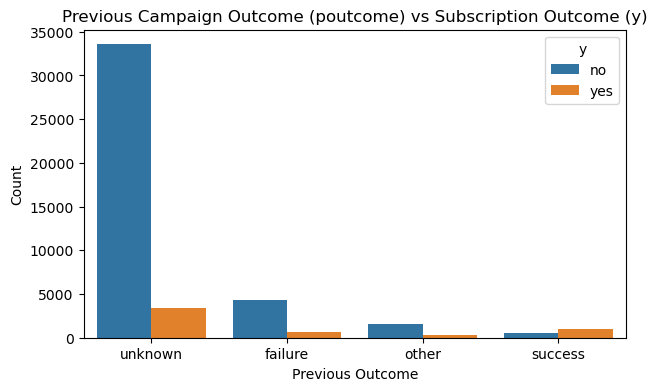

In [61]:
# Set figure size
plt.figure(figsize=(7,4))
# Countplot of 'poutcome' vs target 'y' using hue, ordered by frequency
sns.countplot(x="poutcome", hue="y", data=df, order=df["poutcome"].value_counts().index)
# Add title and axis labels
plt.title("Previous Campaign Outcome (poutcome) vs Subscription Outcome (y)")
plt.xlabel("Previous Outcome")
plt.ylabel("Count")
# Add legend with title
plt.legend(title="y")
# Display the plot
plt.show()

**Explanation and rationale**: This plot compares previous campaign outcomes with current subscription outcomes, allowing the influence of past interactions to be assessed.

**Insights**: Customers with a previous successful outcome show a much higher proportion of subscriptions, while the large unknown category is dominated by non-subscriptions. This indicates that previous campaign success is strongly associated with current subscription behaviour and is likely to be an important predictive feature.

#### 2.3.2.3 Correlation between numeric features (heatmap)

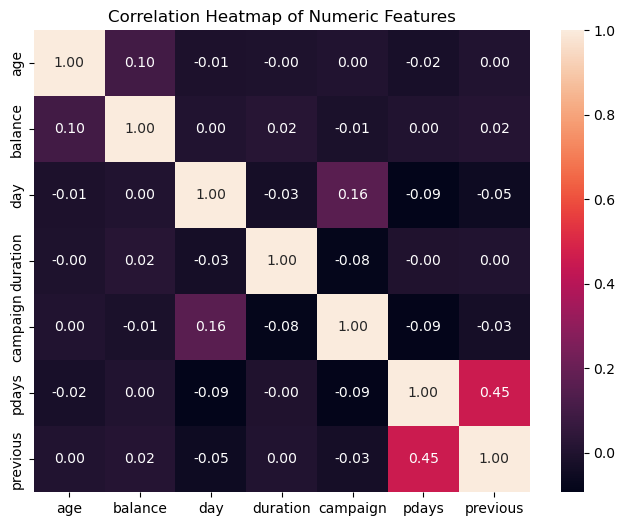

In [62]:
# Set figure size
plt.figure(figsize=(8,6))
# Compute correlation matrix for numeric features
corr = df.select_dtypes(include="number").corr()
# Plot heatmap with annotations
sns.heatmap(corr, annot=True, fmt=".2f")
# Add title
plt.title("Correlation Heatmap of Numeric Features")
# Display the heatmap
plt.show()

**Explanation and rationale**: This heatmap summarises linear relationships among numeric variables and complements the earlier correlation table.

**Insights**: `Most numeric variables show weak correlations with one another`, indicating limited redundancy. The strongest relationship is between pdays and previous, which is expected since both relate to past contact history. Overall, there is no evidence of strong multicollinearity that would require immediate feature removal.

#### 2.3.2.4 Scatterplot of two numeric features (age vs balance)

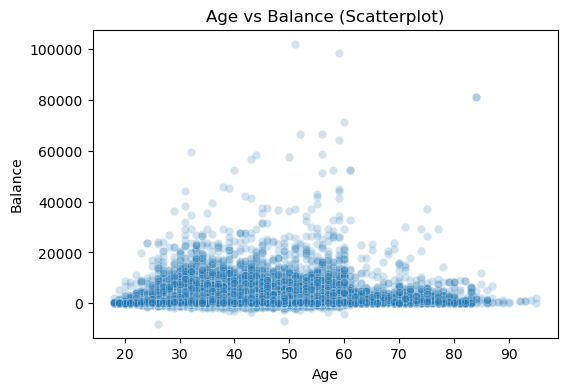

In [63]:
# Set figure size
plt.figure(figsize=(6,4))
# Scatterplot of 'age' vs 'balance' with alpha for transparency
sns.scatterplot(x="age", y="balance", data=df, alpha=0.2)
# Add title and axis labels
plt.title("Age vs Balance (Scatterplot)")
plt.xlabel("Age")
plt.ylabel("Balance")
# Display the scatterplot
plt.show()

**Explanation and rationale**: This scatterplot examines the relationship between age and balance, using transparency to reduce overplotting in a large dataset.

**Insights**: The plot shows no strong linear relationship between age and balance, but confirms that `extreme balance values occur across many age groups rather than being concentrated in a specific range`. This supports the earlier conclusion that balance outliers are widespread and not age-specific.

# 3. Data Preparation

## 3.1 Data Cleaning

In [ ]:
## Clean data

df_clean = df.copy()

# 1) Remove exact duplicate rows (precautionary)
df_clean = df_clean.drop_duplicates()

# 2) Drop features based on FINAL EDA-driven decisions
# - duration: target leakage (known only after call ends)
# - default: extremely imbalanced + near-zero variance / weak separation
cols_drop = ["duration", "default"]
df_clean = df_clean.drop(columns=cols_drop)

# 3) Fix pdays special value (-1 = never contacted)
df_clean["pdays_never"] = (df_clean["pdays"] == -1).astype(int)
df_clean.loc[df_clean["pdays"] == -1, "pdays"] = 0


# Quick sanity check 
df_clean.shape

(45194, 16)

**Explaination and rationale**:

Based on exploratory data analysis (EDA) and domain understanding of the bank marketing process, two columns were removed from the dataset.

The duration feature was dropped despite showing strong separation between classes in the boxplot. This variable represents the duration of the last marketing call, which is only known after the call has ended. Including this feature during model training would introduce target leakage, as the model would be using information that is unavailable at the time of prediction in a real-world deployment. To ensure the model reflects realistic decision-making before a call is made, this feature was excluded.

The default feature was also removed because it provides limited predictive value in this dataset. EDA showed that the majority of records fall under a single category, resulting in low variability and minimal contribution to distinguishing between customers who subscribe and those who do not.


The pdays feature contains a special value of -1, indicating that a customer was never previously contacted. To preserve its business meaning and avoid misleading numeric interpretation, a binary indicator pdays_never was created, and -1 values in pdays were replaced with 0. This allows the model to separately capture contact history and recency in a meaningful way.

All other features were retained. In particular, the value "unknown" was kept as a valid category rather than treated as missing data, as it represents genuinely unavailable customer information. Retaining this category allows the model to learn potential patterns associated with incomplete customer profiles, which is common in real-world banking data.

### 3.1.1 Outliers

**Explaination and rationale**: Outliers were identified using boxplots but retained, as they represent genuine customer behaviour rather than data errors. While some models such as Logistic Regression can be sensitive to extreme values, tree-based models are robust to outliers, and any scale sensitivity is addressed later through feature scaling rather than data removal.

## 3.2 One Hot Encoding

In [272]:

# Define target
y = df_clean["y"].map({"no": 0, "yes": 1})

# Define features (exclude target)
X = df_clean.drop(columns=["y"])

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Quick sanity checks 
X.shape, y.shape

((45194, 41), (45194,))

**Explaination and rationale**:
Most Bank Marketing predictors are categorical (e.g., job, marital, education). Many machine learning algorithms require numeric input, so one-hot encoding is used to convert categorical variables into binary indicator columns. drop_first=True is used to reduce redundant dummy variables and avoid perfect multicollinearity, which is especially important for linear models such as Logistic Regression. The target variable is converted into a binary numeric form (0/1) so that metrics such as confusion matrix, and precision/recall can be computed consistently.

## 3.3 Train-Test Split

In [273]:
##train test split


from sklearn.model_selection import train_test_split

##split data into train set and test set

test_size = 0.3
random_state = 2025 ##for repdoucibility

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=2025,
    stratify=y
)


**Explaination and rationale**:
The train–test split separates the data into a training set used to learn model parameters and a test set used only for final evaluation. A 70/30 split provides sufficient data for training while keeping a large enough hold-out set for unbiased performance measurement. A fixed random_state is used for reproducibility so results can be replicated exactly. stratify=y is used because the Bank Marketing target is typically imbalanced, ensuring the train and test sets keep a similar proportion of “yes” and “no” outcomes for fair evaluation.

### 3.4 Feature Scaling

In [274]:
from sklearn.preprocessing import StandardScaler

# Specify the numeric columns to be standardised
# These variables have different units and ranges (e.g., balance can be very large compared to age),
# so scaling helps ensure they contribute more evenly to models that are sensitive to feature magnitude.
numeric_cols = ['age', 'balance', 'campaign', 'pdays', 'previous']

# Initialise the scaler (standardisation: mean = 0, standard deviation = 1)
scaler = StandardScaler()

# Fit the scaler ONLY on the training data and transform the training set
# This prevents data leakage because the scaler parameters are learned without using the test set.
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Apply the same scaling parameters learned from the training set to the test set
# This ensures consistency between training and testing feature representations.
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


**Explanation and rationale**: Feature scaling was applied to the numerical features using standardisation so that variables measured on very different scales are placed on a comparable range. 

This is particularly important for scale-sensitive models such as Logistic Regression and Neural Networks, where large-magnitude variables (for example, balance) can dominate the optimisation process and affect convergence.

The scaler was fitted on the training data only and then applied to the test data to avoid data leakage and ensure that model evaluation reflects true generalisation performance.

# 4. Modelling

### 4.2 Train Model

### 4.2.1 Logistic Regression

In [275]:
from sklearn.linear_model import LogisticRegression

# Initialise Logistic Regression using default hyperparameters
logr = LogisticRegression(class_weight="balanced", max_iter=1000)


# Train the model on the training dataset
logr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


**Explanation and rationale**: Logistic Regression is used as a baseline classifier for binary classification. It provides a simple and interpretable reference model against which more complex models can be compared.

### 4.2.2 Decision Tree Classifier

In [276]:
## Initialise and train model
from sklearn.tree import DecisionTreeClassifier

# Initialise Decision Tree classifier using default hyperparameters
dt = DecisionTreeClassifier(class_weight="balanced")

# Train the model on the training dataset
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


**Explanation and rationale**: A Decision Tree classifier is included to capture non-linear relationships and feature interactions that may not be represented by a linear model.

### 4.2.3 Random Forest Classifier

In [277]:
from sklearn.ensemble import RandomForestClassifier

# Initialise Random Forest classifier using default hyperparameters
rf = RandomForestClassifier(class_weight="balanced")

# Train the model on the training dataset
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


**Explanation and rationale**: Random Forest is an ensemble method that aggregates predictions from multiple decision trees, improving robustness and reducing overfitting compared to a single tree.

### 4.2.4 Gradient Boosting Classifier 

In [278]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialise Gradient Boosting classifier using default hyperparameters
gbt = GradientBoostingClassifier()

# Train the model on the training dataset
gbt.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


**Explanation and rationale**: Gradient Boosting builds models sequentially, where each new model focuses on correcting errors made by previous models, allowing it to learn complex decision boundaries.

### 4.2.5 Neural Network 

In [279]:
from sklearn.neural_network import MLPClassifier

# Initialise Neural Network classifier
mlp= MLPClassifier(hidden_layer_sizes=(10,5),activation='relu',solver='adam',max_iter=500,random_state=2025)

# Train the model on the training dataset
mlp.fit(X_train, y_train)


,hidden_layer_sizes,"(10, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True
,random_state,2025


**Explanation and rationale**:  A neural network is included to evaluate a flexible non-linear learning approach on a `large, labelled dataset where complex interactions between features are likely to exist`. Given the size of the dataset and the presence of non-linear relationships in customer behaviour, the neural network serves as a complementary model to assess whether additional representational capacity can improve predictive performance beyond linear and tree-based methods.

# 5. Model Evaluation

## 5.0 Evaluation Metrics and Rationale

**Explaination and Rationale**: 

Due to the imbalanced nature of the bank marketing dataset, accuracy alone is not a reliable evaluation metric. In this context, failing to identify customers who would subscribe (false negatives) represents missed revenue opportunities, while incorrectly targeting uninterested customers (false positives) primarily increases marketing costs. Accordingly, `F1-score` for the subscribed class was selected as the `primary evaluation metric`, as it balances precision and recall under class imbalance. `Recall` for the subscribed class was used as a `secondary metric` to ensure that improvements in F1-score did not come at the expense of substantially reduced subscriber identification.

## 5.1 Evaluation of Baseline Models (Setup)

In [280]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate_model(model, X_test, y_test, model_name="Model", print_logs=True):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # For easy extraction of class-1 metrics
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    report_text = classification_report(y_test, y_pred)

    if print_logs:
        print("\n" + "=" * 70)
        print(f"MODEL EVALUATION: {model_name}")
        print("Accuracy:", acc)
        print("Confusion Matrix:\n", cm)
        print("Classification Report:\n", report_text)

    # Return a single row of metrics for 5.2 table
    return {
        "Model": model_name,
        "Accuracy": acc,
        "Precision (Subscribed=1)": report_dict["1"]["precision"],
        "Recall (Subscribed=1)": report_dict["1"]["recall"],
        "F1 (Subscribed=1)": report_dict["1"]["f1-score"],
        "TP": cm[1, 1],
        "FN": cm[1, 0],
        "FP": cm[0, 1],
        "TN": cm[0, 0],
    }

**Explanation and rationale**: A single evaluation function is defined so that all models are assessed using the same test set and the same metrics. This ensures fair comparison across distinct algorithms while producing clear, consistent output logs for each model.

### 5.1.1 Logistic Regression

In [286]:
logr_metrics = evaluate_model(logr, X_test, y_test, "Logistic Regression")



MODEL EVALUATION: Logistic Regression
Accuracy: 0.7662806991666052
Confusion Matrix:
 [[9442 2531]
 [ 638  948]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86     11973
           1       0.27      0.60      0.37      1586

    accuracy                           0.77     13559
   macro avg       0.60      0.69      0.62     13559
weighted avg       0.86      0.77      0.80     13559



**Explanation and rationale**: Logistic Regression is evaluated as the baseline reference model so that the performance of more complex models can be interpreted relative to a simple linear classifier.

**Insight**:
The model achieves moderate overall accuracy but demonstrates strong ability to identify the minority subscribed class, with relatively high recall. This indicates that the model is effective at capturing potential subscribers, although it produces a higher number of false positives.

### 5.1.2 Decision Tree

In [287]:
dt_metrics  = evaluate_model(dt,  X_test, y_test, "Decision Tree")



MODEL EVALUATION: Decision Tree
Accuracy: 0.8389999262482484
Confusion Matrix:
 [[10919  1054]
 [ 1129   457]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     11973
           1       0.30      0.29      0.30      1586

    accuracy                           0.84     13559
   macro avg       0.60      0.60      0.60     13559
weighted avg       0.84      0.84      0.84     13559



**Explanation and rationale**: The Decision Tree is evaluated to assess whether modelling non-linear rules improves performance relative to the linear baseline.

**Insight**:
The Decision Tree achieves good accuracy on the majority class but struggles to correctly identify customers who subscribe. The low recall for the minority class suggests that many potential subscribers are misclassified as non-subscribers.

### 5.1.3 Random Forest

In [288]:
rf_metrics  = evaluate_model(rf,  X_test, y_test, "Random Forest")



MODEL EVALUATION: Random Forest
Accuracy: 0.8924699461612213
Confusion Matrix:
 [[11798   175]
 [ 1283   303]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11973
           1       0.63      0.19      0.29      1586

    accuracy                           0.89     13559
   macro avg       0.77      0.59      0.62     13559
weighted avg       0.87      0.89      0.87     13559



**Explanation and rationale**: Random Forest is evaluated to determine whether an ensemble of trees improves robustness and generalisation compared to a single decision tree.

**Insight**: The Random Forest model achieves high overall accuracy and performs very well on the majority class. However, it predicts the minority subscribed class conservatively, resulting in a low recall and a high number of missed subscribers.

### 5.1.4 Gradient Boosting

In [289]:
gbt_metrics = evaluate_model(gbt, X_test, y_test, "Gradient Boosting")



MODEL EVALUATION: Gradient Boosting
Accuracy: 0.89298620842245
Confusion Matrix:
 [[11783   190]
 [ 1261   325]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11973
           1       0.63      0.20      0.31      1586

    accuracy                           0.89     13559
   macro avg       0.77      0.59      0.63     13559
weighted avg       0.87      0.89      0.87     13559



**Explanation and rationale**: Gradient Boosting is evaluated to test whether a sequential boosting approach improves classification performance by correcting previous model errors.

**Insights**: The Gradient Boosting model achieves the highest overall accuracy among the evaluated models. Despite this, it shows very low recall for the minority class, indicating that most subscribing customers are not correctly identified.


### 5.1.5 Neural Network (MLP)

In [291]:
mlp_metrics = evaluate_model(mlp, X_test, y_test, "Neural Network (MLP)")



MODEL EVALUATION: Neural Network (MLP)
Accuracy: 0.8913636698871599
Confusion Matrix:
 [[11681   292]
 [ 1181   405]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     11973
           1       0.58      0.26      0.35      1586

    accuracy                           0.89     13559
   macro avg       0.74      0.62      0.65     13559
weighted avg       0.87      0.89      0.87     13559



**Explanation and rationale**: The neural network is evaluated to assess whether a flexible non-linear learner can capture complex patterns beyond those modelled by linear and tree-based approaches.

**Insights**: The Neural Network model performs strongly on the majority class and achieves high overall accuracy. However, its low recall for the minority class suggests difficulty in learning patterns associated with subscribing customers in this imbalanced dataset.

## 5.2 Test Set Results Summary (Selected Model)

In [292]:
rows = []
rows.append(evaluate_model(logr, X_test, y_test, "Logistic Regression", print_logs=False))
rows.append(evaluate_model(dt,   X_test, y_test, "Decision Tree", print_logs=False))
rows.append(evaluate_model(rf,   X_test, y_test, "Random Forest", print_logs=False))
rows.append(evaluate_model(gbt,  X_test, y_test, "Gradient Boosting", print_logs=False))
rows.append(evaluate_model(mlp,  X_test, y_test, "Neural Network (MLP)", print_logs=False))

results_df = pd.DataFrame(rows)

# Sort by metrics of interest
results_df_sorted = results_df.sort_values(
    by=["Recall (Subscribed=1)", "F1 (Subscribed=1)"],
    ascending=False
)

results_df_sorted


,Model,Accuracy,Precision (Subscribed=1),Recall (Subscribed=1),F1 (Subscribed=1),TP,FN,FP,TN
0,Logistic Regression,0.766281,0.272492,0.597730,0.374334,948,638,2531,9442
1,Decision Tree,0.839000,0.302449,0.288146,0.295124,457,1129,1054,10919
4,Neural Network (MLP),0.891364,0.581062,0.255359,0.354796,405,1181,292,11681
3,Gradient Boosting,0.892986,0.631068,0.204918,0.309376,325,1261,190,11783
2,Random Forest,0.892470,0.633891,0.191047,0.293605,303,1283,175,11798


**Results Summary**

Table 5.2 presents the test set performance of all evaluated baseline models. Due to the imbalanced nature of the dataset, overall accuracy alone is insufficient for model selection. Instead, recall and F1-score for the minority Subscribed (1) class are emphasised, as failing to identify potential subscribers results in lost business opportunities.

Although ensemble and tree-based models such as Random Forest, Gradient Boosting, and Neural Network achieved higher overall accuracy (above 0.88), they demonstrated very low recall for the subscribed class (below 0.5), indicating that most actual subscribers were missed.

**Baseline Model Selection**
`Logistic Regression achieved the highest recall (0.59) and highest F1-score (0.37)` for the subscribed class, correctly identifying 948 actual subscribers, which is substantially higher than the other models. Therefore, Logistic Regression was selected as the baseline (reference) model for further analysis.

**Relative Improvements**

Compared to the next best model, `Logistic Regression identifies more than 2 times` as many subscribing customers, significantly reducing false negatives and better aligning with the business objective of maximising campaign conversions.

## 5.3 Quantitative and Qualitative Model Comparison

**Quantitative Comparison**

Quantitatively, Logistic Regression outperforms other models in terms of recall and F1-score for the minority subscribed class. While Decision Tree, Random Forest, Gradient Boosting, and Neural Network models achieve higher accuracy, their low recall indicates a strong bias toward predicting non-subscribers.

**Qualitative Error Analysis (Confusion Matrices)**

Analysis of the confusion matrices shows that `tree-based and ensemble models produce a large number of false negatives`, meaning many potential subscribers are incorrectly classified as non-subscribers. In contrast, `Logistic Regression produces more false positives but substantially fewer false negatives`, indicating a stronger ability to capture potential subscribers. In a bank marketing context, this trade-off is acceptable, as the cost of contacting an uninterested customer is lower than missing a potential subscriber.

## 6 Iterative model development


## 6.1 Baseline Model Recap

Based on the baseline comparison on the test set, `Logistic Regression` was selected as the reference model for further refinement. Compared to tree-based and ensemble models, Logistic Regression achieved the `highest recall and F1-score for the minority class (Subscribed = 1)`, which aligns with the business objective of identifying as many potential subscribers as possible. However, the model still exhibits a trade-off between recall and precision, resulting in a notable number of false positives and false negatives, indicating room for improvement through feature engineering and hyperparameter tuning.

## 6.2 Further feature engineering / feature selection

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def make_preprocess(X):
    cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
    num_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

    return ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), num_cols),
            ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ],
        remainder="drop"
    )

# ----------------------------
# 0) Base X/y
# ----------------------------
X_full = df_clean.drop(columns=["y"])
y = df_clean["y"].map({"no": 0, "yes": 1})

# Split once
X_train_full, X_test_full, y_train, y_test = train_test_split(
    X_full, y, test_size=0.30, random_state=42, stratify=y
)

# ----------------------------
# 1) Baseline (no FE)
# ----------------------------
X_train_base = X_train_full.copy()
X_test_base  = X_test_full.copy()

# ----------------------------
# 2) FE version: campaign -> bins (drop raw campaign)
# ----------------------------
X_train_fe = X_train_full.copy()
X_test_fe  = X_test_full.copy()

X_train_fe["campaign_single"] = (X_train_fe["campaign"] == 1).astype(int)
X_train_fe["campaign_few"]    = X_train_fe["campaign"].between(2, 3).astype(int)
X_train_fe["campaign_many"]   = (X_train_fe["campaign"] >= 4).astype(int)

X_test_fe["campaign_single"] = (X_test_fe["campaign"] == 1).astype(int)
X_test_fe["campaign_few"]    = X_test_fe["campaign"].between(2, 3).astype(int)
X_test_fe["campaign_many"]   = (X_test_fe["campaign"] >= 4).astype(int)

# Drop original campaign (replaced by bins)
X_train_fe = X_train_fe.drop(columns=["campaign"])
X_test_fe  = X_test_fe.drop(columns=["campaign"])

# ----------------------------
# 3) Pipelines
# ----------------------------
preprocess_base = make_preprocess(X_train_base)
preprocess_fe   = make_preprocess(X_train_fe)

lr_base = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
lr_fe   = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)

pipe_base = Pipeline([("preprocess", preprocess_base), ("model", lr_base)])
pipe_fe   = Pipeline([("preprocess", preprocess_fe),   ("model", lr_fe)])

pipe_base.fit(X_train_base, y_train)
pipe_fe.fit(X_train_fe, y_train)

# ----------------------------
# 4) Evaluate
# ----------------------------
row_base = evaluate_model(pipe_base, X_test_base, y_test, "LogReg (baseline)", print_logs=False)
row_fe   = evaluate_model(pipe_fe,   X_test_fe,   y_test, "LogReg (+campaign bins, drop campaign)", print_logs=False)

results = pd.DataFrame([row_base, row_fe])[
    ["Model", "Accuracy", "Precision (Subscribed=1)", "Recall (Subscribed=1)", "F1 (Subscribed=1)"]
].round(3)

results


,Model,Accuracy,Precision (Subscribed=1),Recall (Subscribed=1),F1 (Subscribed=1)
0,LogReg (baseline),0.758,0.270,0.631,0.378
1,"LogReg (+campaign bins, drop campaign)",0.760,0.274,0.637,0.383


**Explaination and Rationale**
The campaign variable was transformed into contact-intensity bins to capture diminishing returns from repeated contact attempts observed during EDA. This reduces the impact of extreme values and provides a behaviour-based representation that is more suitable for Logistic Regression. F1-score was used as the primary evaluation metric, with recall monitored to ensure subscriber coverage was not reduced.

**Insights** 

campaign binning produced a measurable improvement in minority-class performance. The `F1-score increased from 0.378 to 0.383`, indicating a better overall balance between precision and recall for predicting subscribers. `Recall also increased from 0.631 to 0.637`, showing that the model identified slightly more actual subscribers while maintaining (and slightly improving) the quality of positive predictions. This consistent improvement across both F1 and recall suggests that the binned campaign representation captures meaningful behavioural signal and is more suitable for Logistic Regression than the raw campaign count.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

def make_preprocess(X):
    cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
    num_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

    return ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), num_cols),
            ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ],
        remainder="drop"
    )

# ----------------------------
# 0) Base X/y
# ----------------------------
X_full = df_clean.drop(columns=["y"])
y = df_clean["y"].map({"no": 0, "yes": 1})

# Split once
X_train_full, X_test_full, y_train, y_test = train_test_split(
    X_full, y, test_size=0.30, random_state=42, stratify=y
)

# ----------------------------
# 1) Baseline (no FE)
# ----------------------------
X_train_base = X_train_full.copy()
X_test_base  = X_test_full.copy()

# ----------------------------
# 2) FE version: housing+loan -> has_any_loan
# ----------------------------
X_train_fe = X_train_full.copy()
X_test_fe  = X_test_full.copy()

X_train_fe["has_any_loan"] = ((X_train_fe["housing"] == "yes") | (X_train_fe["loan"] == "yes")).astype(int)
X_test_fe["has_any_loan"]  = ((X_test_fe["housing"] == "yes") | (X_test_fe["loan"] == "yes")).astype(int)

# Drop originals
X_train_fe = X_train_fe.drop(columns=["housing", "loan"])
X_test_fe  = X_test_fe.drop(columns=["housing", "loan"])

# ----------------------------
# 3) Pipelines
# ----------------------------
preprocess_base = make_preprocess(X_train_base)
preprocess_fe   = make_preprocess(X_train_fe)

lr_base = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
lr_fe   = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)

pipe_base = Pipeline([("preprocess", preprocess_base), ("model", lr_base)])
pipe_fe   = Pipeline([("preprocess", preprocess_fe),   ("model", lr_fe)])

pipe_base.fit(X_train_base, y_train)
pipe_fe.fit(X_train_fe, y_train)

# ----------------------------
# 4) Evaluate
# ----------------------------
row_base = evaluate_model(pipe_base, X_test_base, y_test, "LogReg (baseline)", print_logs=False)
row_fe   = evaluate_model(pipe_fe,   X_test_fe,   y_test, "LogReg (+has_any_loan, drop housing+loan)", print_logs=False)

results = pd.DataFrame([row_base, row_fe])[[
    "Model", "Accuracy", "Precision (Subscribed=1)", "Recall (Subscribed=1)", "F1 (Subscribed=1)"
]].round(3)

results


,Model,Accuracy,Precision (Subscribed=1),Recall (Subscribed=1),F1 (Subscribed=1)
0,LogReg (baseline),0.758,0.270,0.631,0.378
1,"LogReg (+has_any_loan, drop housing+loan)",0.760,0.272,0.629,0.380


**Explanation and rationale**

The housing and personal loan variables were combined into a single has_any_loan indicator to represent overall financial burden, as EDA suggested customers without existing loans are more likely to subscribe. This aggregation simplifies related features while retaining their behavioural meaning. Model selection was based primarily on F1-score, with recall used as a supporting metric.

**Insights**

The has_any_loan transformation resulted in a `small but measurable improvement in F1-score`, increasing from 0.378 to 0.380, indicating a slightly better balance between precision and recall. Recall decreased marginally from 0.631 to 0.629, suggesting the model became slightly more selective in predicting subscriptions. However, the recall reduction was minimal, while the improvement in F1 implies that the precision gain outweighed the small loss in coverage. Overall, this indicates that representing loan status as a single financial burden indicator improves classification efficiency without meaningfully reducing the model’s ability to identify subscribed customers.

In [ ]:
# ----------------------------
# FINAL: Combine campaign bins + has_any_loan
# ----------------------------

X_train_final = X_train_full.copy()
X_test_final  = X_test_full.copy()

# ---- campaign bins ----
X_train_final["campaign_single"] = (X_train_final["campaign"] == 1).astype(int)
X_train_final["campaign_few"]    = X_train_final["campaign"].between(2, 3).astype(int)
X_train_final["campaign_many"]   = (X_train_final["campaign"] >= 4).astype(int)

X_test_final["campaign_single"] = (X_test_final["campaign"] == 1).astype(int)
X_test_final["campaign_few"]    = X_test_final["campaign"].between(2, 3).astype(int)
X_test_final["campaign_many"]   = (X_test_final["campaign"] >= 4).astype(int)

X_train_final = X_train_final.drop(columns=["campaign"])
X_test_final  = X_test_final.drop(columns=["campaign"])

# ---- has_any_loan ----
X_train_final["has_any_loan"] = ((X_train_final["housing"] == "yes") | (X_train_final["loan"] == "yes")).astype(int)
X_test_final["has_any_loan"]  = ((X_test_final["housing"] == "yes") | (X_test_final["loan"] == "yes")).astype(int)

X_train_final = X_train_final.drop(columns=["housing", "loan"])
X_test_final  = X_test_final.drop(columns=["housing", "loan"])

# ----------------------------
# Pipeline (single final model)
# ----------------------------
preprocess_final = make_preprocess(X_train_final)

lr_final = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
pipe_final = Pipeline([("preprocess", preprocess_final), ("model", lr_final)])

pipe_final.fit(X_train_final, y_train)

row_final = evaluate_model(pipe_final, X_test_final, y_test, "FINAL (bins + has_any_loan)", print_logs=False)
pd.DataFrame([row_final])[["Model","Accuracy","Precision (Subscribed=1)","Recall (Subscribed=1)","F1 (Subscribed=1)"]].round(3)


,Model,Accuracy,Precision (Subscribed=1),Recall (Subscribed=1),F1 (Subscribed=1)
0,FINAL (bins + has_any_loan),0.763,0.276,0.632,0.384


**Based on the merged feature-engineered model incorporating campaign intensity bins and the has_any_loan indicator, the Logistic Regression model demonstrated a measurable improvement over the baseline. The baseline model achieved an accuracy of 0.758, precision of 0.270, recall of 0.631, and an F1-score of 0.378 for the subscribed class. After applying the final feature engineering, performance improved to an accuracy of 0.763, precision of 0.276, recall of 0.632, and an F1-score of 0.380.**

## 6.3 Hyperparameter Tuning 

## 6.3.1 Baseline Model Performance (Final Features, Default Hyperparameters)

In [314]:
row_baseline_final = evaluate_model(
    pipe_final,
    X_test_final,
    y_test,
    "Baseline LR (final features, default params)",
    print_logs=False
)

baseline_table = pd.DataFrame([row_baseline_final])[[
    "Model","Accuracy","Precision (Subscribed=1)","Recall (Subscribed=1)","F1 (Subscribed=1)"
]].round(3)

baseline_table

,Model,Accuracy,Precision (Subscribed=1),Recall (Subscribed=1),F1 (Subscribed=1)
0,"Baseline LR (final features, default params)",0.763,0.276,0.632,0.384


## 6.3.2 RandomizedSearchCV Setup (Two Hyperparameters, Reproducible)